<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/Aplica%C3%A7%C3%A3o_de_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy # métodos e modelos estatísticos
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [4]:
idade = [18,25,57,45,26,64,37,40,24,33]
salarioAnual=[15000,29000,68000,52000,32000,80000,41000,45000,26000,33000]

xData = np.array(idade)
yData = np.array(salarioAnual)

In [16]:
# Fórmula que procura gerar a melhor reta que miniza os erros previstos
# x = o valor da variável independente
# a = coefiente angular da reta que dará a inclinação
# b = intercepto é o valor que a reta irá tocar o eixo do Y
def equacaoLinear(x, a, b):
  return a * x + b

In [8]:
parametrosIniciais = np.array([1.0, 1.0])

In [17]:
# Encontrar a melhor reta
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosIniciais)
parametrosOtimizados

array([ 1320.53256667, -6627.65171673])

In [18]:
pcov

array([[ 3.40257832e+03, -1.25555141e+05],
       [-1.25555141e+05,  5.31788958e+06]])

In [19]:
previsaoModelo = equacaoLinear(xData, *parametrosOtimizados)
previsaoModelo

array([17141.93448327, 26385.66244994, 68642.70458328, 52796.31378328,
       27706.19501661, 77886.43254995, 42232.05324995, 46193.65094995,
       25065.12988328, 36949.92298328])

In [26]:
# O erro absoluto é obtido através da subtração do valor real com o previsto
# no caso, o valor real é Y - yData e o previsto de acordo com a equação citado acima
# gerou o resultado na variável previsaoModelo
erroAbsoluto = previsaoModelo - yData

In [20]:
erro_quadrado = np.square(erroAbsoluto)

MSE = np.mean(erro_quadrado)
print('SE: ', erro_quadrado)
# MSE é a média da soma de todos os erros absolutos elevado ao quadrado 
print('MSE: ', MSE)

SE:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE:  5479238.909036714


In [24]:
np.mean(erro_quadrado)

5479238.909036714

In [29]:
# Isto é quer dizer que a variável independente explica 
# o comportamento da variável Y em torno de
# 98% dos casos estudados.
Rsquared_R2 = 1.0 - (np.var(erroAbsoluto) / np.var(yData))
print('Coeficiente de determinação: ', Rsquared_R2)

Coeficiente de determinação:  0.9846300347582353


In [28]:
print('Y = {}X {}'.format(parametrosOtimizados[0],parametrosOtimizados[1]))

Y = 1320.5325666669085X -6627.651716729711


Text(0, 0.5, 'Salário Anula (R$)')

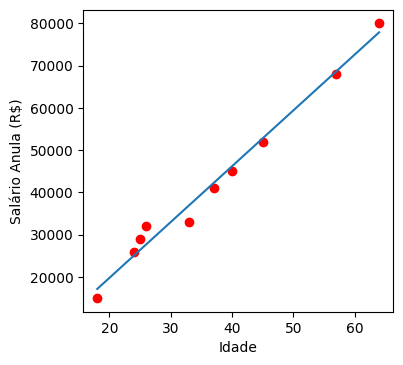

In [32]:
f = plt.figure(figsize = (4,4), dpi = 100)

axes = f.add_subplot(111)

axes.plot(xData, yData, 'ro')

xModel = np.linspace(min(xData), max(xData))
yModel = equacaoLinear(xModel, *parametrosOtimizados)

axes.plot(xModel, yModel)
plt.xlabel('Idade')
plt.ylabel('Salário Anula (R$)')

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
linear_regression = LinearRegression()
x_model_sklearn = xData.reshape((-1,1))
regressao = linear_regression.fit(x_model_sklearn, yData)

In [36]:
previsao = linear_regression.predict(x_model_sklearn)

In [38]:
var_mean_squared_error = mean_squared_error(yData, previsao)
print('MSE: ', var_mean_squared_error)

MSE:  5479238.909036706


In [39]:
print('Y = {}X {}'.format(linear_regression.coef_, linear_regression.intercept_))

r2 = r2_score(yData, previsao)

print('Coeficiente de Determinação - R2: ', r2)

Y = [1320.53256496]X -6627.651646877624
Coeficiente de Determinação - R2:  0.9846300347582353


In [40]:
import pandas as pd

In [42]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [43]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [44]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [51]:
linear_regression   = LinearRegression()
x_reshaped          = x.reshape((-1,1))
regressao           = linear_regression.fit(x_reshaped, y)

In [52]:
previsao = linear_regression.predict(x_reshaped)

In [53]:
print('Y = {}X {}'.format(linear_regression.coef_, linear_regression.intercept_))

r2 = r2_score(y, previsao)

print('Coeficiente de Determinação - R2:', r2)

Y = [0.26342934]X 325.5734210494426
Coeficiente de Determinação - R2: 0.639311719957


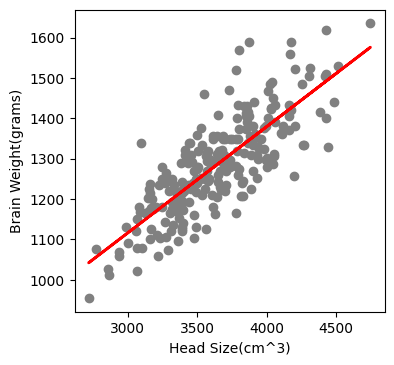

In [54]:
plt.figure(figsize=(4,4), dpi = 100)
plt.scatter(x, y, color = 'gray')
plt.plot(x, previsao, color = 'red', linewidth=2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()